In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.metrics import confusion_matrix, adjusted_rand_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load and Preprocess Dataset
iris = load_iris()
X = pd.DataFrame(iris.data, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
y_true = iris.target  # For evaluation only (don't use in clustering)

# Check for missing values
print(X.isnull().sum())

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


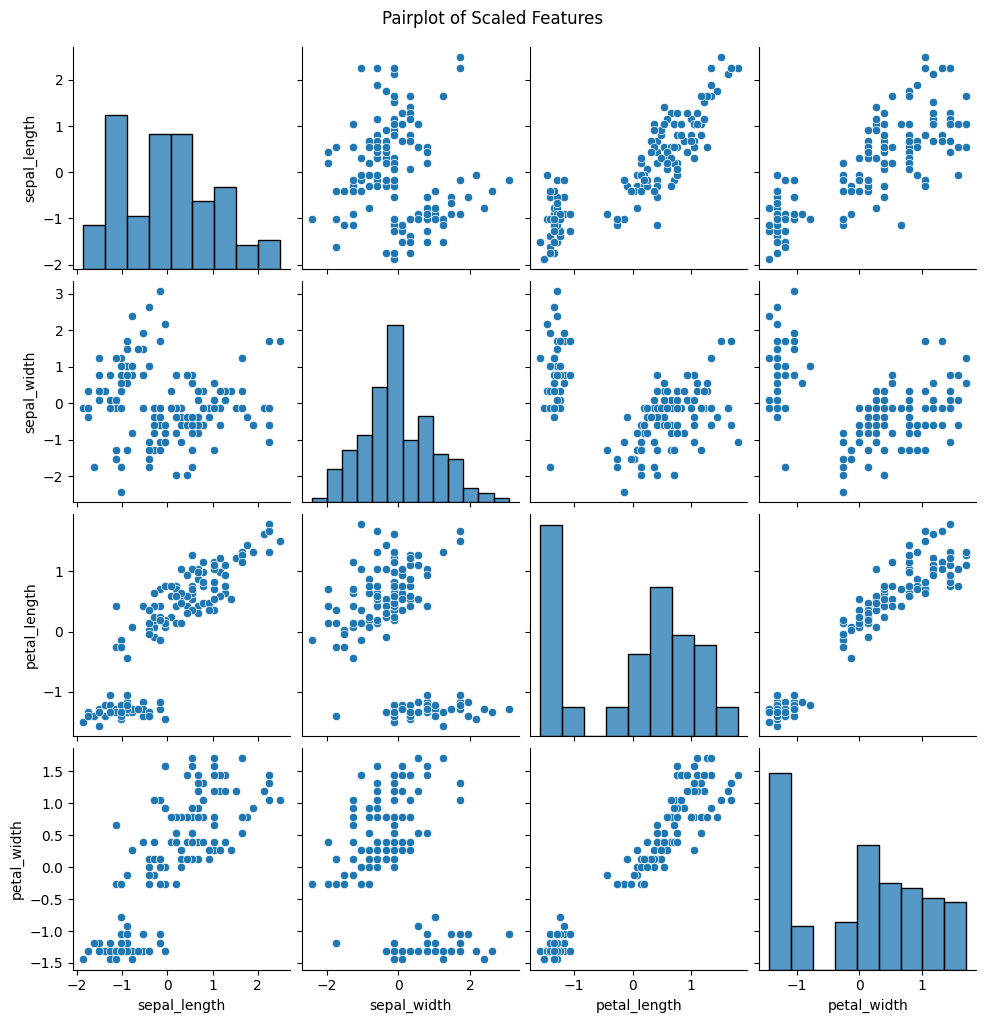

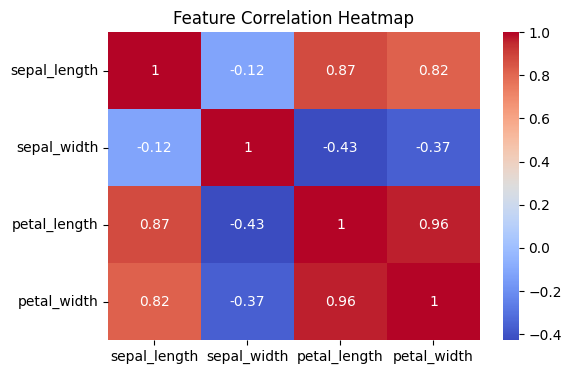

In [3]:
# : EDA
# Summary Statistics
print(X.describe())

# Pairplot
sns.pairplot(pd.DataFrame(X_scaled, columns=X.columns))
plt.suptitle("Pairplot of Scaled Features", y=1.02)
plt.show()

# Heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


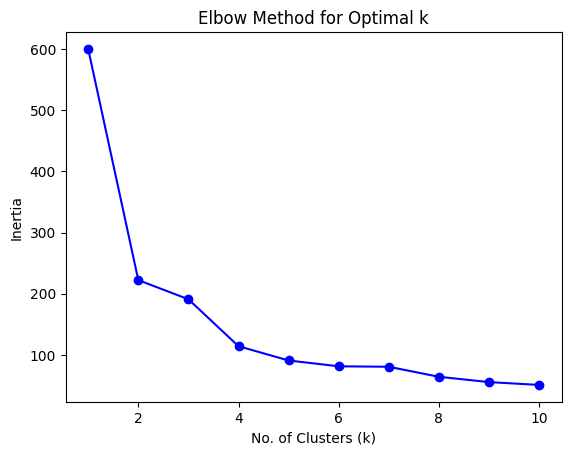

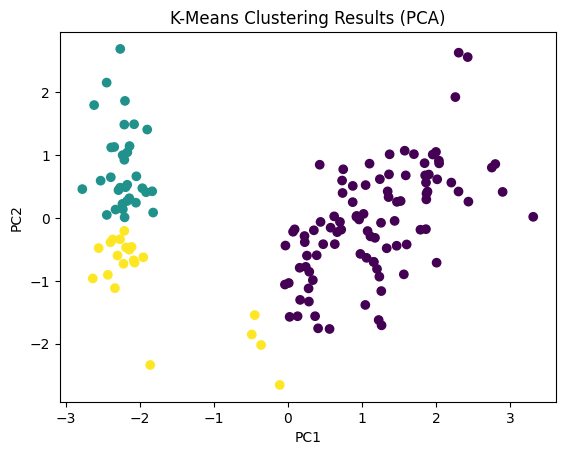

In [4]:
#  K-Means Clustering
# Elbow Method
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel("No. of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal k")
plt.show()

# Choose k=3
kmeans = KMeans(n_clusters=3, random_state=42)
k_labels = kmeans.fit_predict(X_scaled)

# Visualize using PCA(principal component analyis)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=k_labels, cmap='viridis')
plt.title("K-Means Clustering Results (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


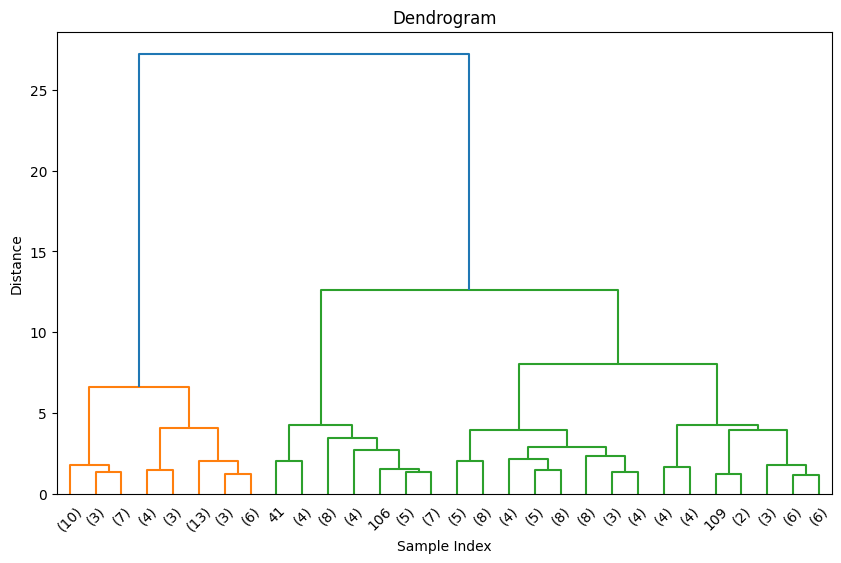

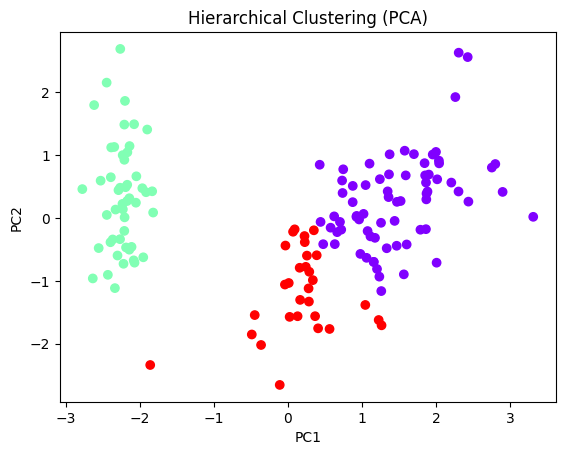

In [5]:
# Hierarchical Clustering
# Dendrogram
plt.figure(figsize=(10, 6))
link = linkage(X_scaled, method='ward')
dendrogram(link, truncate_mode='lastp', p=30)
plt.title("Dendrogram")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

# Agglomerative Clustering with n=3
agg = AgglomerativeClustering(n_clusters=3)
h_labels = agg.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=h_labels, cmap='rainbow')
plt.title("Hierarchical Clustering (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


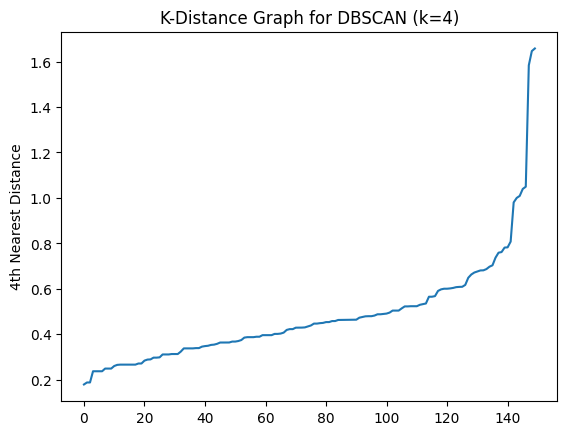

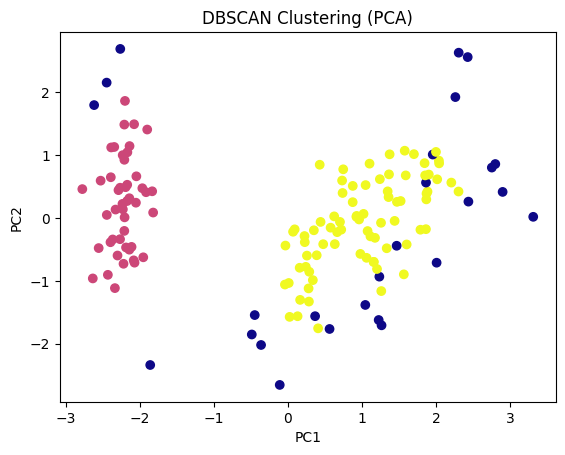

In [6]:
#  DBSCAN
# k-distance plot to choose eps
from sklearn.neighbors import NearestNeighbors

neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(X_scaled)
distances, indices = nbrs.kneighbors(X_scaled)

distances = np.sort(distances[:, 3])
plt.plot(distances)
plt.title("K-Distance Graph for DBSCAN (k=4)")
plt.ylabel("4th Nearest Distance")
plt.show()

# From the plot, choose eps ≈ 0.6
db = DBSCAN(eps=0.6, min_samples=5)
db_labels = db.fit_predict(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='plasma')
plt.title("DBSCAN Clustering (PCA)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


In [7]:
#  Evaluation
from sklearn.metrics import adjusted_rand_score, confusion_matrix

def evaluate(true, pred, title):
    print(f"Adjusted Rand Index ({title}):", adjusted_rand_score(true, pred))
    print("Confusion Matrix:")
    print(confusion_matrix(true, pred))

evaluate(y_true, k_labels, "KMeans")
evaluate(y_true, h_labels, "Hierarchical")
evaluate(y_true, db_labels, "DBSCAN")


Adjusted Rand Index (KMeans): 0.432804702527474
Confusion Matrix:
[[ 0 33 17]
 [46  0  4]
 [50  0  0]]
Adjusted Rand Index (Hierarchical): 0.6153229932145449
Confusion Matrix:
[[ 0 49  1]
 [23  0 27]
 [48  0  2]]
Adjusted Rand Index (DBSCAN): 0.4706267335681117
Confusion Matrix:
[[ 0  0  0  0]
 [ 4 46  0  0]
 [ 8  0 42  0]
 [14  0 36  0]]
